In [1]:
# import the libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
# MNIST image size - 28x28
input_img = Input(shape=(784,))
# encoding layers
encoded = Dense(1000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(100, activation='relu')(encoded)
encoded = Dense(30, activation='relu')(encoded)
# decoding layer
decoded = Dense(100, activation='relu')(encoded)
decoded = Dense(250, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# The model
autoencoder = Model(input_img, decoded)

In [3]:
# Encoder model 
encoder = Model(input_img, encoded)

In [4]:
# Decoder model
encoded_input = Input(shape=(30,))
decoder_layer1 = autoencoder.layers[-5]
decoder_layer2 = autoencoder.layers[-4]
decoder_layer3 = autoencoder.layers[-3]
decoder_layer4 = autoencoder.layers[-2]
decoder_layer5 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))))

In [5]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [6]:
# labels aren't requried 
(x_train,_), (x_test,_) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
#10 epochs result has given high accuracy, if 100, the loss will decrease tremendously
autoencoder.fit(x_train, x_train, epochs = 10, batch_size = 256, shuffle = True)

Epoch 1/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.1257
Epoch 2/10
60000/60000 [==============================] - 24s 407us/step - loss: 0.1250
Epoch 3/10
60000/60000 [==============================] - 28s 472us/step - loss: 0.1241
Epoch 4/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.1237
Epoch 5/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.1229
Epoch 6/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.1222
Epoch 7/10
60000/60000 [==============================] - 24s 402us/step - loss: 0.1215
Epoch 8/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.1208
Epoch 9/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.1201
Epoch 10/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.1193


In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

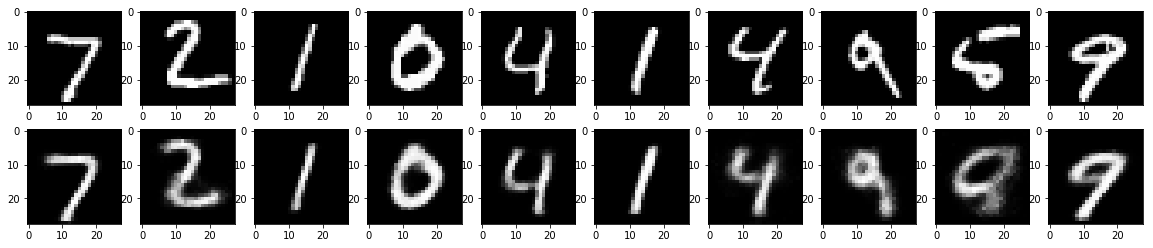

In [14]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # input images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    # reconstructed images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    
plt.show()